The following document demonstrates the ability to easily query the cleaned UK dataset for Tesco shop locations.

## Analysis

First we import the required libraries:


In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

We then read in the dataset using `geopandas` and print the first 5 rows:


In [2]:
columns = ["names_value", "category_main", "brand_name_value", "geometry"]

df = gpd.read_parquet("./data/processed/uk_places_admin.parquet", columns=columns)
df.head()

,names_value,category_main,brand_name_value,geometry
0,Bronwydd Veterinary Surgery,veterinarian,None,POINT (254708.502 370538.548)
1,Cemlyn Tea Shop,tea_room,None,POINT (258094.706 331179.494)
2,Tyn Y Ffridd Farm,holiday_rental_home,None,POINT (258072.833 368446.748)
3,Veterans Shed Gwynedd,professional_services,None,POINT (261938.258 366951.837)
4,Canolfan Feddygol Bron Derw Medical Centre,family_practice,None,POINT (258390.558 372463.709)


The following code block prints the total number of points that are classified as part of the 'Tesco' brand:


In [3]:
tesco = df.loc[df["brand_name_value"] == "Tesco"]
len(tesco)

2717

Note that the `names_value` column also contains some Tesco locations that are tagged by the `brand_name_value` column. We can identify these and ensure that they are considered supermarkets or convenience stores using:


In [4]:
tesco_names = df.loc[
    df["names_value"].str.contains("Tesco|Tesco Express|Tesco Extra|Tesco Metro")
    & (df["category_main"].isin(["supermarket", "convenience_store"]))
]
len(tesco_names)

2753

For our plot we choose Tesco locations identified by their brand column, and colour by the name of each location:


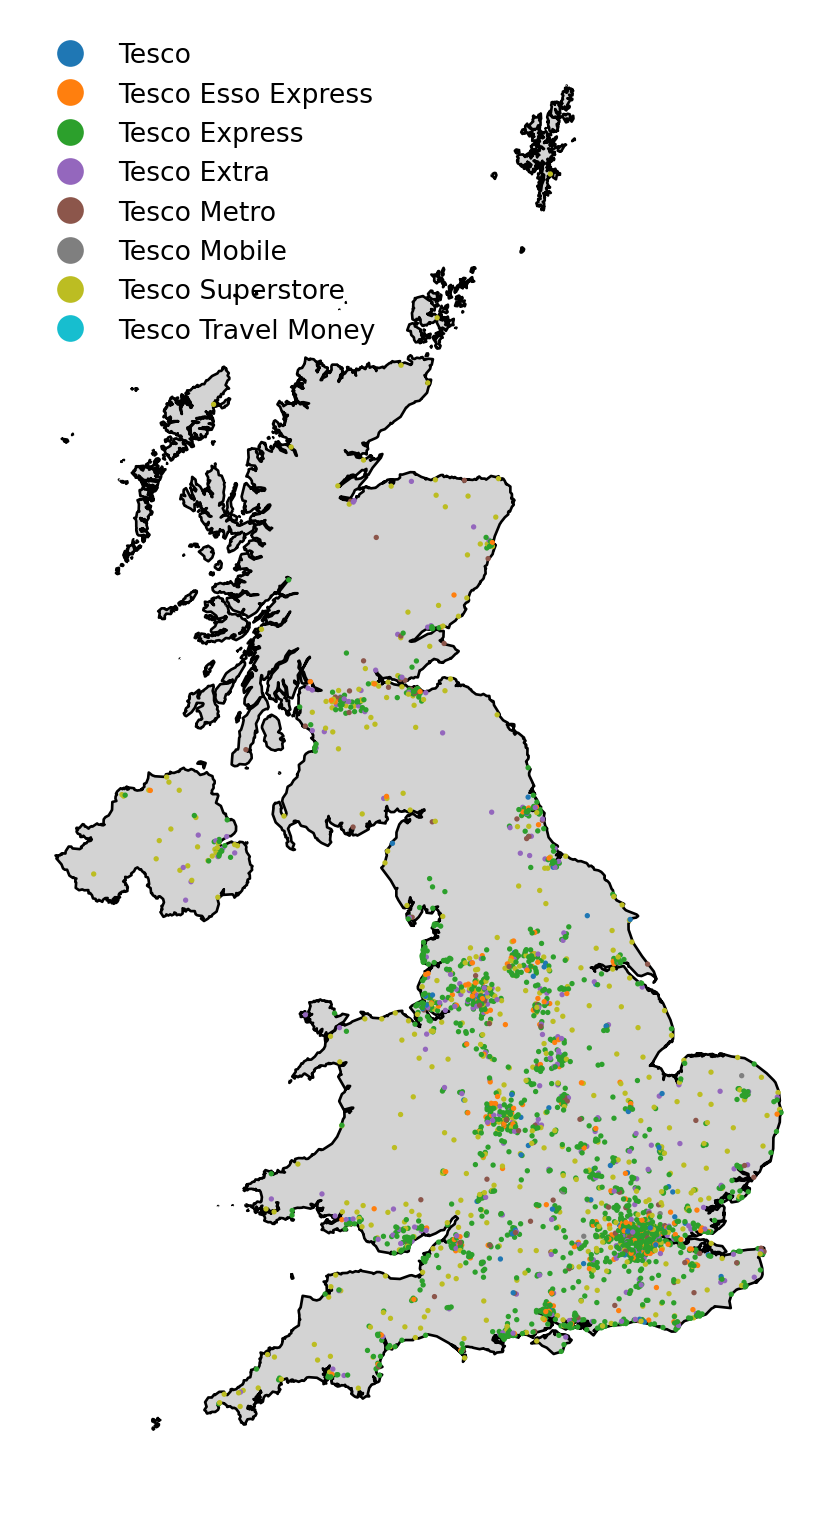

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))

# The Local Authority Boundaries for the United Kingdom are available from https://geoportal.statistics.gov.uk/datasets/79a4e87783be4b6bbb96ddad6dda52a3_0/explore
lad = gpd.GeoSeries(gpd.read_file("~/data/LAD_BUC_2022.gpkg").unary_union, crs=27700)

gpd.GeoSeries(lad).plot(facecolor="lightgrey", edgecolor="black", ax=ax)
tesco.plot(
    "names_value",
    ax=ax,
    legend=True,
    legend_kwds={"frameon": False},
    markersize=1,
)

ax.axis("off")
plt.show()